# Huiswerk #3

## Versie van 29 oktober 2025

### Gegevens

Naam: Casper Juffermans

Studentnummer: 4270118

## Algemene opmerkingen

- Dit notebook moet worden ingeleverd op BrightSpace
- Er zijn in totaal 110 punten te halen (waarvan 10 bonus).
  - De beoordeling van de opgaven gaat niet alleen over het juiste resultaat, maar ook over de leesbaarheid en structuur van de code. Zorg er dus voor dat het goed na te kijken is, en dat je code comments heeft die uitleggen wat er gebeurt, waar nodig.
  - In deze opgave wordt je ook geacht om stukjes text toe te voegen, met een analyze van resultaten. Maak er dus een klein verslagje van.
- Voer de cel hieronder ook uit, die importeert de modules die je in deze huiswerk set nodig hebt
- Gebruik **np.random** voor random getallen, en niet gewoon 'random'!

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# De module 'numba' kan helpen met de snelheid van je code. Met 'jit' (just-in-time)
# worden functies gecompileerd (=vertaald naar machine code), waardoor ze veel sneller
# zijn doordat bijv for-loops geoptimaliseerd worden.

# Het kan zijn dat je deze module nog moet installeren ('conda install numba'),
# maar de opgave kan ook gewoon zonder! Als deze cel dus een error geeft met numba,
# kun je deze import ook weghalen.

# Haal de # hieronder weg om numba te importeren. We raden je aan om de opgave eerst gewoon te starten, en dit later te proberen

from numba import jit 

## Fase-overgang in magneten met het Ising model <a class='anchor' id='ising'></a> (100pt)

Een van de bekendste natuurkundige modellen is het Ising model. Dit model beschrijft kleine magneetjes die op een rooster zitten, en die alleen een noord- en zuid-pool hebben: het zijn binaire variabelen (oftewel ze nemen maar 2 verschillende waarden aan; wij kiezen die hier als $-1$ en $+1$). In 2D kunnen we die weergeven als plaatjes met alleen witte en zwarte pixels. Meestal hebben we het over 'spins' in plaats van kleine magneetjes, omdat het de elektronen-spins zijn die voor het magnetische moment zorgen. Zo'n plaatje kan er bijvoorbeeld zo uitzien voor een $10 \times 10$ rooster:

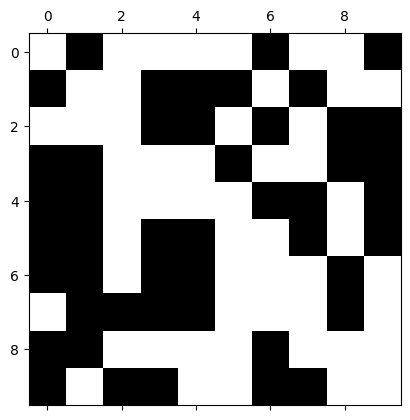

In [5]:
spins = np.random.choice([-1,1], size=(10,10))
plt.matshow(spins, cmap='gray')

Het idee achter het Ising model is simpel, maar leidt tot verrassend veel interessante natuurkunde. Zo kunnen we er de fase-overgang van magnetisch naar niet-magnetisch van permanente magneten mee verklaren als functie van temperatuur.

We blijven zoals het plaatje hierboven bij een vierkant rooster, met afmetingen $L \times L$. Er zijn dus $L^2$ spins, in een $L\times L$ plaatje met zwarte en witte pixels. Aan elke configuratie van zwarte en witte pixels kent het Ising model een bepaalde energie toe, die bepaald wordt door voor elke pixel te kijken naar de 4 aangrenzende buren. Als een buur hetzelfde is (dus beiden zwart of beiden wit), gaat de energie 1 omlaag. Als ze omgekeerd zijn (dus eentje wit en eentje zwart), gaat de energie 1 omhoog. Dit kunnen we vangen in de volgende functie voor de energie $E$:

$$ E = -\frac{1}{2}\sum_{\langle i,j\rangle} \sigma_i \sigma_j. $$

In deze formule is $\sigma_i$ de waarde van de spin op locatie $i$, en kan dus $\sigma_i = +1$ of $\sigma_i = -1$ zijn (binair). De notatie $\langle i,j \rangle$ wordt vaak gebruikt om aan te geven dat we over alle $i$ sommeren en voor elke $i$ dan alleen de 'nearest neighbours' $j$ meenemen. Voor het gemak nemen we periodieke randvoorwaarden aan: het is alsof je dit 2D plaatje eerst oprolt tot een koker, en er daarna een torus (donut) van maakt. De spins aan de randen zijn dus ook buren van elkaar, zodat elke spin 4 buren heeft. Merk op dat in de formule hierboven elk _paar_ spins twee keer meegenomen wordt (bijvoorbeeld een keer $\sigma_1 \sigma_2$, maar ook $\sigma_2 \sigma_1$). Daarom hebben we de factor $1/2$ toegevoegd.

**[1]** *(10 punten)* Schrijf als eerste opdracht een functie `energie` die een 2D array genaamd `spins` als input neemt, en de energie van de configuratie terug geeft. Je kunt gebruik maken van `L = spins.shape[0]` om `L` te halen uit de 2D array.

In [6]:
from numpy import take

@jit(nopython=True)  # Deze statement kun je gebruiken als je numba gebruikt (zie allereerste cel!)

def energie(spins):
    ''' Schrijf hier een korte beschrijving van wat deze functie doet ''' # TO-DO
    cumulative_energy = 0 

    L_spins = spins.shape[0]
    
    for i in range(L_spins):
        for j in range (L_spins):
            polarity = spins[i,j] # sigma_i

            # accesing with wrap around
            neighbors_sum = (
                spins[(i + 1) % L_spins, j] +
                spins[(i - 1) % L_spins, j] +
                spins[i, (j + 1) % L_spins] +
                spins[i, (j - 1) % L_spins]
            )

            cumulative_energy += polarity * neighbors_sum

    return cumulative_energy * -0.5 # scalair multiplication is left to the end to prevent repeated calculations 

Test jouw code op de volgende configuraties

Energie van configuratie A:  -32.0
Energie van configuratie B:  32.0
Energie van configuratie C:  8.0


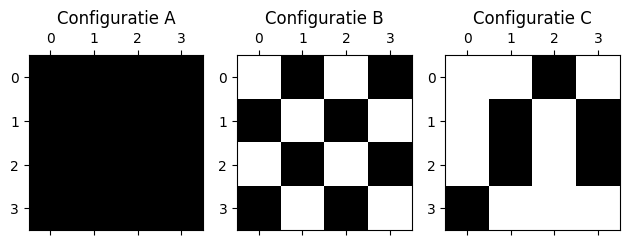

In [7]:
# Testconfiguraties
configuratie_A = np.ones((4,4))
configuratie_B = np.array([[1, -1, 1, -1],[-1, 1, -1, 1], [1, -1, 1, -1], [-1, 1, -1, 1]])
configuratie_C = np.array([[1, 1, -1, 1], [1, -1, 1, -1], [1, -1, 1, -1], [-1, 1, 1, 1]])

# Plot de configuraties
fig, ax = plt.subplots(1,3)
ax[0].matshow(configuratie_A, cmap='gray')
ax[1].matshow(configuratie_B, cmap='gray')
ax[2].matshow(configuratie_C, cmap='gray')
ax[0].set_title("Configuratie A")
ax[1].set_title("Configuratie B")
ax[2].set_title("Configuratie C")
fig.tight_layout()

# Test de energie-functie
energie_A = energie(configuratie_A)
print("Energie van configuratie A: ", energie_A)  # Zou -32 moeten zijn

energie_B = energie(configuratie_B)
print("Energie van configuratie B: ", energie_B)  # Zou 32 moeten zijn

energie_C = energie(configuratie_C)
print("Energie van configuratie C: ", energie_C)  # Zou 8 moeten zijn

In de natuurkunde zijn we vaak op zoek naar de laagste energie toestanden, en dat is ook onze opdracht hier. Die laagste energie toestand hangt af van de temperatuur $T$.

Als we bij het absolute nulpunt zijn, dus $T = 0$, zijn er twee laagste-energie-toestanden: de toestand waarbij alle pixels wit zijn, en de toestand waarbij alle pixels zwart zijn.

**[2]** *(4 punten)* Controleer dat die twee configuraties inderdaad dezelfde energie hebben, en dat ze het meest negatief zijn.



In [8]:
hypothesis_holds = True

for k in range(4,10): # 10 was chosen as an arbitraty number to prove the condition holds true for larger arrays, with 3 being chosen an arbitraty starting point
    spins_zwart, spins_wit = np.ones((k,k))*-1, np.ones((k,k))
    if(energie(spins_zwart) != energie(spins_wit)):
        hypothesis_holds = False
        break
if(hypothesis_holds):
    print("De hypothese dat deze waarde altijd hetzelfde zijn is correct")


De hypothese dat deze waarde altijd hetzelfde zijn is correct


Als we de temperatuur verhogen, krijgen de magneetjes/spins thermische energie en kunnen ze willekeurig van kleur veranderen (ze 'flippen' van zwart naar wit of andersom); hoe hoger de temperatuur, hoe vaker ze flippen. Het andere uiterste van hele hoge temperatuur is gekenmerkt door 'ruis': de plaatjes bestaan uit willekeurige zwart/wit pixels.

Ergens is er een temperatuur, de zogenaamde kritische temperatuur $T_c$, waarboven de plaatjes ruizig worden en waaronder de plaatjes geordend blijven; dit noemen we een fase-overgang. In deze opgave gaan we die fase-overgang proberen te vinden. Daarvoor kijken we naar de *magnetisatie* van een configuratie:

$$ m = \sum_i \sigma_i. $$

Als de plaatjes ruizig zijn, gaat deze magnetisatie naar $0$ (er komen gemiddeld gezien net zoveel zwarte als witte pixels voor). Aan de andere kant, als de spins gaan ordenen (dezelfde kant op wijzen), wordt de magnetisatie 'niet-nul' (vaak zegt men ook wel 'eindig').

**[3]** *(3 punten)* Schrijf een functie die de magnetisatie van een configuratie berekent, en test deze met de code hieronder.

In [9]:
def magnetisatie(spins):
    m = 0 
    L_spins = spins.shape[0] 
    for i in range(L_spins):
        for j in range(L_spins):
            m += spins[i,j]
    return m

magnetisatie_A = magnetisatie(configuratie_A)
print("Magnetisatie van configuratie A: ", magnetisatie_A)  # Zou 16 moeten zijn

magnetisatie_B = magnetisatie(configuratie_B)
print("Magnetisatie van configuratie B: ", magnetisatie_B)  # Zou 0 moeten zijn

magnetisatie_C = magnetisatie(configuratie_C)
print("Magnetisatie van configuratie C: ", magnetisatie_C)  # Zou 4 moeten zijn

Magnetisatie van configuratie A:  16.0
Magnetisatie van configuratie B:  0
Magnetisatie van configuratie C:  4


Voor het vinden van de laagste energietoestand bij een gegeven temperatuur gaan we gebruik maken van het Metropolis-Hastings algoritme. Dat is een Monte Carlo methode die we hieronder gaan implementeren, maar waarvan we de precieze uitleg achterwege laten.

Dit algoritme werkt door telkens een willekeurige spin te selecteren, en die proberen te flippen met een bepaalde kans $p_{flip}$. Die kans hangt af van de temperatuur $T$ en de verandering in energie $\Delta E$ die de flip zou geven.

$$p_{flip}=\left\{\begin{array}{cl}
1 & \text { als } \Delta E < 0 \\
e^{-\Delta E/T} & \text { als } \Delta E > 0
\end{array}\right. $$

Als de nieuwe energie dus lager wordt ($\Delta E < 0$) flipt de spin sowieso, en als de nieuwe energie hoger wordt ($\Delta E > 0$) flipt de spin met een kans $e^{-\Delta E/T}$.

Eén zo'n poging om een spin te flippen noemen we hieronder een `monte_carlo_stap`.

**[4]** *(12 punten)* De eerste stap is nu dus het implementeren van een functie `monte_carlo_stap(spins, T)`, die een enkele Monte Carlo stap neemt. Je mag ervan uitgaan dat `spins` een 2D array is met alleen `-1` of `1` elementen.
  * [**4.a**] Start de functie `monte_carlo_stap` met het extraheren van $L$ uit `spins`.
  * [**4.b**] Bereken de energie van `spins` en sla die op in een variabele.
  * [**4.c**] Genereer een willekeurige $(x,y)$ coordinaat, en flip vervolgens de spin op die plek. Bereken ook van deze nieuwe configuratie de energie en sla die op in een nieuwe variabele.
  * [**4.d**] Bereken nu $\Delta E$ als het verschil van de twee energieën.
  * [**4.e**] Bepaal nu of de spin geflipt wordt, en geef de daarbij behorende configuratie terug.
    * Als $\Delta E$ negatief is, dan returnt `monte_carlo_stap` de nieuwe configuratie (dus met de spin op $(x,y)$ geflipt).
    * Als $\Delta E$ positief is, dan kan de functie *alsnog* de nieuwe configuratie returnen, maar dan met een kans gegeven door $e^{-\Delta E/T}$. Anders returnt de functie de oorspronkelijke configuratie.
    
      **Tip**: Voor $\Delta E > 0$, trek een willekeurig getal tussen 0 en 1. Als dat getal kleiner is dan $e^{-\Delta E/T}$, dan lukt de flip.



In [60]:
from numpy import random


def monte_carlo_stap(spins,T):

    # calculating first state data
    L_spins = spins.shape[0] 
    e_spins = energie(spins)

    # determining 2nd state and calculating relevant data
    x_rand, y_rand = (random.randint(L_spins),random.randint(L_spins))
    new_spins = spins.copy()
    new_spins[x_rand,y_rand] = -1 * new_spins[x_rand,y_rand]
    e_new_spins = energie(new_spins)
    delta_e = e_new_spins-e_spins

    # determining result stage
    if delta_e>0:
        return spins
    
    if random.rand() < np.exp(-delta_e/T):
        return new_spins
    
    return spins




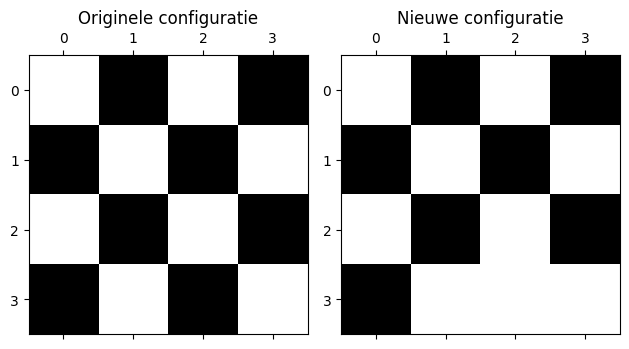

In [100]:
T = 1e4
configuratie = np.copy(configuratie_B)

# Doe een Monte Carlo stap en plot het resultaat
fig, ax = plt.subplots(1,2)
ax[0].matshow(configuratie, cmap='gray')
configuratie = monte_carlo_stap(configuratie, T)
ax[1].matshow(configuratie, cmap='gray')
ax[0].set_title("Originele configuratie")
ax[1].set_title("Nieuwe configuratie")
fig.tight_layout()
plt.show()

Met deze functie kunnen we nu een nieuwe functie `equilibreer()` schrijven, die voor een gegeven temperatuur en een begin configuratie van spins $N$ 'sweeps' doet. Een 'sweep' bestaat uit $L^2$ Monte Carlo stappen. Na $L^2$ stappen heb je namelijk gemiddeld elke spin 1 keer geprobeerd te flippen.

**[5]** *(8 punten)* Schrijf `equilibreer(spins, T, N)`, die als antwoord 3 dingen terug geeft:
  * Een numpy array met de gemiddelde magnetisatie per spin als functie van het aantal sweeps,
  * Een numpy array met de gemiddelde energie per spin als functie van het aantal sweeps,
  * De laatste spin configuratie

In [102]:
def equilibreer(spins,T,N):

    L_spins = spins.shape[0]
    
    avg_magnetisatie = np.array([magnetisatie(spins)])
    avg_energie = np.array([energie(spins)])

    for i in range(1,N):
        for j in range(L_spins**2):
            spins = monte_carlo_stap(spins,T)
        avg_magnetisatie = np.append(avg_magnetisatie,magnetisatie(spins))
        avg_energie = np.append(avg_energie,energie(spins))
    
    return avg_magnetisatie,avg_energie,energie(spins)


**[6.a]** *(3 punten)* Run de code hieronder, en plot $m$ en $E$ als functie van het aantal sweeps (denk aan de assen!). Beschrijf en analyseer wat je ziet.

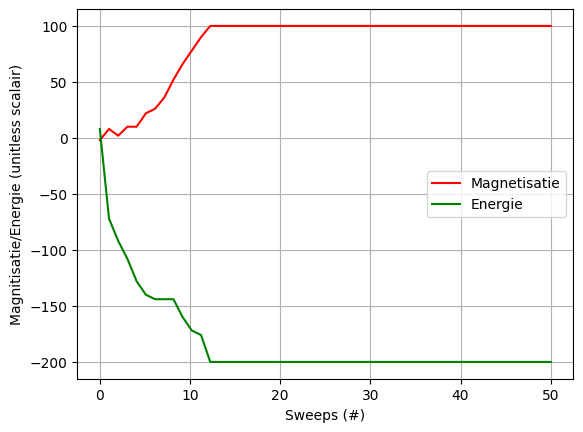

In [109]:
L = 10
T = 1
np.random.seed(1234)
start_configuratie = np.random.choice([-1,1], size=(L,L))

# Equilibreer voor 50 sweeps
m, E, spin_configuratie = equilibreer(start_configuratie, T, 50)

sweeps = np.linspace(0,len(m),len(m)) # using linspace(0,n) would be more clear, however I am not removing the 50 from the line above 

fig, ax = plt.subplots()

ax.plot(sweeps,m, label='Magnetisatie', color="red")
ax.plot(sweeps,E,label='Energie', color="green")
ax.set_ylabel("Magnitisatie/Energie (unitless scalair)") # aangezien er geen eenheden zijn aangegeven neem ik aan dat alles eenheidloos is 
ax.set_xlabel("Sweeps (#)")
plt.grid(True)

ax.legend()

# We zien dat na, een korte tijd, zowel de magnitisatie als de energie equilibreren.



**[6.b]** *(3 punten)* Herhaal deze laatste twee stappen, maar nu voor `T = 4`. Je zult nu meer sweeps moeten doen (bijv. $500$). Beschrijf weer wat je ziet

In [110]:
L = 10
T = 4
np.random.seed(1234)
start_configuratie = np.random.choice([-1,1], size=(L,L))
m, E, spin_configuratie = equilibreer(start_configuratie, T, 500)

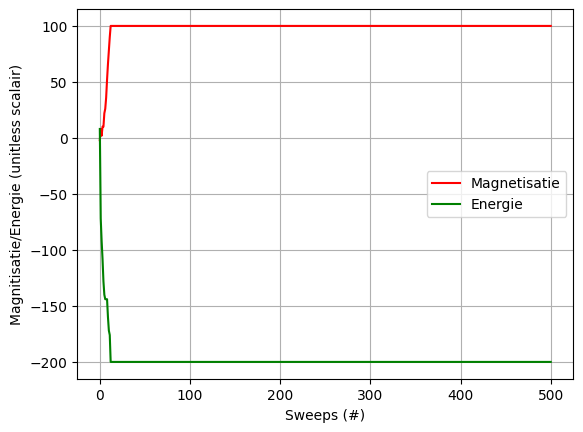

In [111]:
sweeps = np.linspace(0,len(m),len(m)) # using linspace(0,n) would be more clear, however I am not removing the 500 from the line above 
fig, ax = plt.subplots()

ax.plot(sweeps,m, label='Magnetisatie', color="red")
ax.plot(sweeps,E,label='Energie', color="green")
ax.set_ylabel("Magnitisatie/Energie (unitless scalair)") # aangezien er geen eenheden zijn aangegeven neem ik aan dat alles eenheidloos is 
ax.set_xlabel("Sweeps (#)")
plt.grid(True)

ax.legend()

# We zien dat bij een hogere energie het sneller equilibreert.


### De vragen hieronder duren wat langer om te simuleren, afhankelijk van de snelheid van je computer. Het is het waard om te proberen of je numba kunt gebruiken (zie bovenaan de notebook, en ook niet vergeten om de @jit() regels aan te zetten!)

**[7]** *(16 punten)* Gebruik nu de `equilibreer()` functie als volgt.

  - **[7.a]** Maak een lijst `Ts` van temperaturen, die in $10$ stappen van $T=1$ naar $T=4$ gaat. Gebruik een `for`-loop om over die lijst te itereren.

  - **[7.b]** Initialiseer voor elke $T$ een willekeurige spin-configuratie van afmeting $L=20$, en equilibreer die met $1000$ sweeps. Bereken de gemiddelde energie, en de gemiddelde absolute waarde van de magnetisatie van de laatste $10$ sweeps, en voeg deze gemiddelde waardes toe aan een nieuwe lijsten.

  - **[7.c]** Plot de lijst met gemiddelde absolute waarde van magnetisaties versus de temperaturen, en beschrijf het resultaat. Doe hetzelfde voor de lijst met gemiddelde energieën.

**Tip** Gebruik `print()` in de loop om aan te geven welke temperatuur op dat moment ge-equilibreert wordt. Dan weet je hoe ver de for-loop is, en hoe lang het nog ongeveer gaat duren. Afhankelijk van je laptop en code kan het totaal enkele minuten duren.

In [112]:
Ts = np.linspace(1,4,10)
m_new = np.array([])
e_new = np.array([])

N = 1000 # spins
L = 20 

for T in Ts:
    spins = np.random.choice([-1, 1], size=(L, L))
    m,E, spin_configuratie = equilibreer(spins,T,N)
    m_new = np.append(m_new,np.mean(m[-10:]))
    e_new = np.append(e_new,np.mean(E[-10:])) 



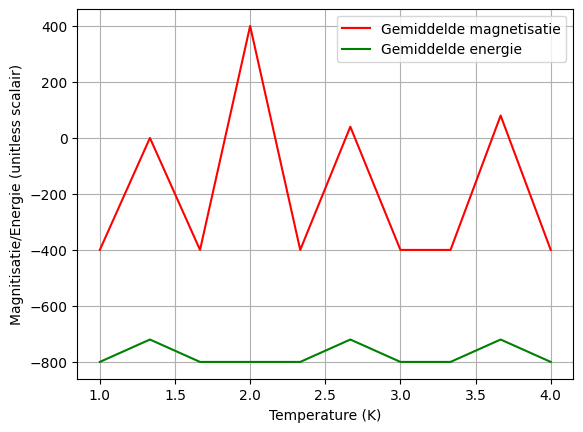

In [115]:
fig, ax = plt.subplots()

ax.grid("True")
ax.plot(Ts,m_new, label="Gemiddelde magnetisatie", color="red")
ax.plot(Ts,e_new, label="Gemiddelde energie", color="green")
ax.set_ylabel("Magnitisatie/Energie (unitless scalair)") # aangezien er geen eenheden zijn aangegeven neem ik aan dat alles eenheidloos is 
ax.set_xlabel("Temperature (K)") #K is een gokje, er staan voor een ntk vak best weinig eenheden overal bij
ax.legend()



Uit deze plot kunnen we een hele ruwe indicatie van de kritieke temperatuur $T_c$ halen: daar waar de magnetisatie naar 0 gaat. Om $T_c$ veel nauwkeuriger te bepalen, zouden we dit experiment moeten herhalen voor steeds grotere systemen ($50\times 50$, $100\times 100$), en dan zouden we zien dat de magnetisatie-vs-temperatuur-curve convergeert. Om dat te kunnen doen zouden we de code veel meer moeten optimaliseren, en een ander algoritme gebruiken. Dat zullen we nu niet doen, en laten we over aan een geavanceerd computational physics vak.

Gelukkig kunnen we met wat kleinere systemen nog heel wat doen. Bijvoorbeeld fysieke eigenschappen van het systeem bepalen, zoals de soortelijke warmte $C = \frac{\partial E}{\partial T}$ ('hoe verandert de energie van ons systeem als we de temperatuur veranderen'?).

De soortelijke warmte $C$ kan worden omgeschreven naar:

$$ C = \frac{1}{L^2 T^2} \left( \langle E^2 \rangle - \langle E \rangle^2 \right)$$

waarbij de $\langle
 \rangle$ staan voor het middelen over Monte Carlo stappen.

 Maar ook kijken we nog naar de zogenaamde Binder parameter $U$, waarmee we ook voor kleine systemen een betere schatting van $T_c$ krijgen:

$$ U = \frac{\langle m^4 \rangle}{3 \langle m^2 \rangle^2} $$

**[8.a]** *(3 punten)* Schrijf een functie `soortelijke_warmte(E,T)` die de array van energieën `E` en de temperatuur `T` als parameters heeft, en $C$ berekent.

**[8.b]** *(3 punten)* Schrijf een functie `binder(m)` die de array van magnetisaties `m` als parameter heeft, en $U$ berekent.

**[8.c]** *(5 punten)* Herhaal het experiment van vraag **7**, maar hou nu ook lijsten voor $C$ en $U$ bij. Plot en beschrijf de resultaten.

In [116]:
def soortelijke_warmte(E,T):
    C = 1/(L**2*T**2) * (np.mean(E**2) - np.mean(E)**2)
    return C

def binder(m):
    U = np.mean(m**4)/(3*(np.mean(m**2))**2)
    return U

In [ ]:
Ts = np.linspace(1,4,10)
m_new = np.array([])
e_new = np.array([])
C_arr = np.array([])
U_arr = np.array([])

N = 1000 # spins
L = 20 

for T in Ts:
    spins = np.random.choice([-1, 1], size=(L, L))
    m,E, spin_configuratie = equilibreer(spins,T,N)
    C, U = soortelijke_warmte(E,T), binder(m)
    m_new = np.append(m_new,np.mean(m[-10:]))
    e_new = np.append(e_new,np.mean(E[-10:]))
    C_arr = np.append(C_arr,C) 
    U_arr = np.append(U_arr,U)


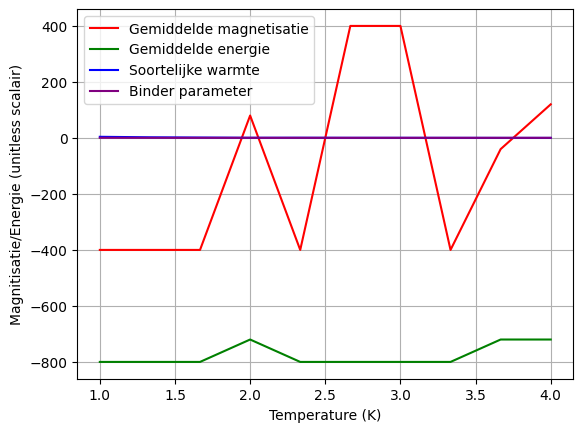

In [119]:
fig, ax = plt.subplots()

ax.grid("True")
ax.plot(Ts,m_new, label="Gemiddelde magnetisatie", color="red")
ax.plot(Ts,e_new, label="Gemiddelde energie", color="green")
ax.plot(Ts,C_arr, label="Soortelijke warmte", color="blue")
ax.plot(Ts,U_arr, label="Binder parameter", color="purple")

ax.set_ylabel("Magnitisatie/Energie (unitless scalair)") # aangezien er geen eenheden zijn aangegeven neem ik aan dat alles eenheidloos is 
ax.set_xlabel("Temperature (K)") #K is een gokje, er staan voor een ntk vak best weinig eenheden overal bij
ax.legend()

**[9]** *(30 punten)* Bedenk nu zelf een onderzoeksvraag over het Ising model, en beantwoord die vraag met een simulatie. Gebruik markdown cellen om de vraag, hypothese, methode, resultaten en conclusies toe te lichten. Gebruik voor de simulatie de functies die we in de vorige opgaves gedefinieerd hebben, en maak eventueel nieuwe functies als je die nodig hebt. Wees creatief! Enkele voorbeeldjes:
  * Wat verandert er als je een extern magnetisch veld $h$ toevoegt? Dit kan door de energie aan te passen naar: $E = -\frac{1}{2}\sum_{\langle i,j\rangle} \sigma_i \sigma_j  - h\sum_j \sigma_j$
  * Wat is de kritieke temperatuur van het systeem? Maak een zo goed mogelijke schatting inclusief nauwkeurigheid.
  * Hoe verandert het gedrag / de waardes van het systeem als we $L$ groter of kleiner maken?
  * Wat gebeurt er als we in plaats van 1 spin, meerdere spins proberen te flippen in een enkele Monte Carlo stap?
  * Wat gebeurt er als je de interacties tussen de spins aanpast, bijvoorbeeld door ze sterker te maken met een factor J (pas dan de energiefunctie aan: $E = -\frac{J}{2}\sum_{\langle i,j\rangle} \sigma_i \sigma_j$), of door extra buren mee te nemen?

Je mag deze voorbeelden gebruiken, of je eigen vraag bedenken. Voel je ook vrij om er meerdere te doen als je dat leuk vindt!

**Tip** Als je voor je simulatie een bestaande functie uit een vorige opgave aan wilt passen, doe dat dan hieronder, zodat je de originele versie ook behoudt.

Onderzoeksvraag:

Hypothese:

Methode/plan:

In [22]:
# Jouw code hier

--------------------------------------------------
# Bonus (10pt):

Je hebt misschien gemerkt dat je voor sommige temperaturen meer sweeps moet doen voordat de magnetisatie (en de energie) convergeren. Het zou fijn zijn om dat beter te kunnen bepalen, zodat we niet te veel sweeps doen als dat niet nodig is.

Om dat systematisch te doen, kijken we naar de zogenaamde 'autocorrelatie' van de magnetisatie. 'Auto' slaat hier terug op de correlatie van een signaal _met zichzelf_. De autocorrelatie functie $\chi(n)$ is gedefinieerd als:

$$ \chi(n) = \frac{1}{N-n} \sum_{n'}^{N-n} m(n')m(n' + n) - \frac{1}{(N-n)^2}\sum_{n'}^{N-n}m(n) \times \sum_{n'}^{N-n} m(n' + n),$$

waarbij $n$ (en $n'$) over de Monte Carlo sweeps lopen, en $N$ het totale aantal Monte Carlo sweeps is.

Schrijf nu een functie `autocorrelatie(m)` die de autocorrelatie functie $\chi(n)$ berekent, voor $n = 0$ tot $n = N/2$, met `N = len(m)`. Gebruik die functie om de autocorrelatie te plotten voor een paar verschillende temperaturen.

In [23]:
# Jouw code hier

In [24]:
# Jouw code om te plotten hier

Je zou nu voor elke temperatuur een exponentieel afvallende functie kunnen fitten, $e^{-n/\tau}$, of zelf op het oog kijken wat de verval constante $\tau$ (de _correlatie tijd_). Valt je daarbij iets op?

  Nu we $\tau$ hebben, kunnen we ook de berekening van de magnetisatie en energie is netter doen. De spin configuraties voor twee opeenvolgende Monte Carlo stappen zijn namelijk heel erg gecorreleerd (en soms zelfs identiek), dus dat geeft een vertekend beeld. Het beste houden we dus niet de energie _elke_ stap bij, maar elke $\tau$ stappen. Dan weten dat de configuratie op stap $n$ genoeg verschillend is van die op stap $n + \tau$. De grootheid $\tau$ geeft dus aan hoe lang (in Monte Carlo stappen) twee configuraties nog aan elkaar gecorreleerd zijn.

  Pas je algoritme zo aan dat $\tau$ gebruikt wordt.

In [25]:
# Jouw code hier